In [20]:
import keras
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential #simple CNN
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D
import os 

In [52]:
num_classes = 20
img_rows, img_cols= 32,32
batch_size = 16

train_data_dir = r"D:\Projects\Simpsons Character Recognition\1408_27569_bundle_archive\simpsons_dataset"
validation_data_dir = r"D:\Projects\Simpsons Character Recognition\1408_27569_bundle_archive\kaggle_simpson_testset"

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 19548 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


In [53]:

model = Sequential()
model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=20, activation="softmax"))

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 8, 8, 128)        

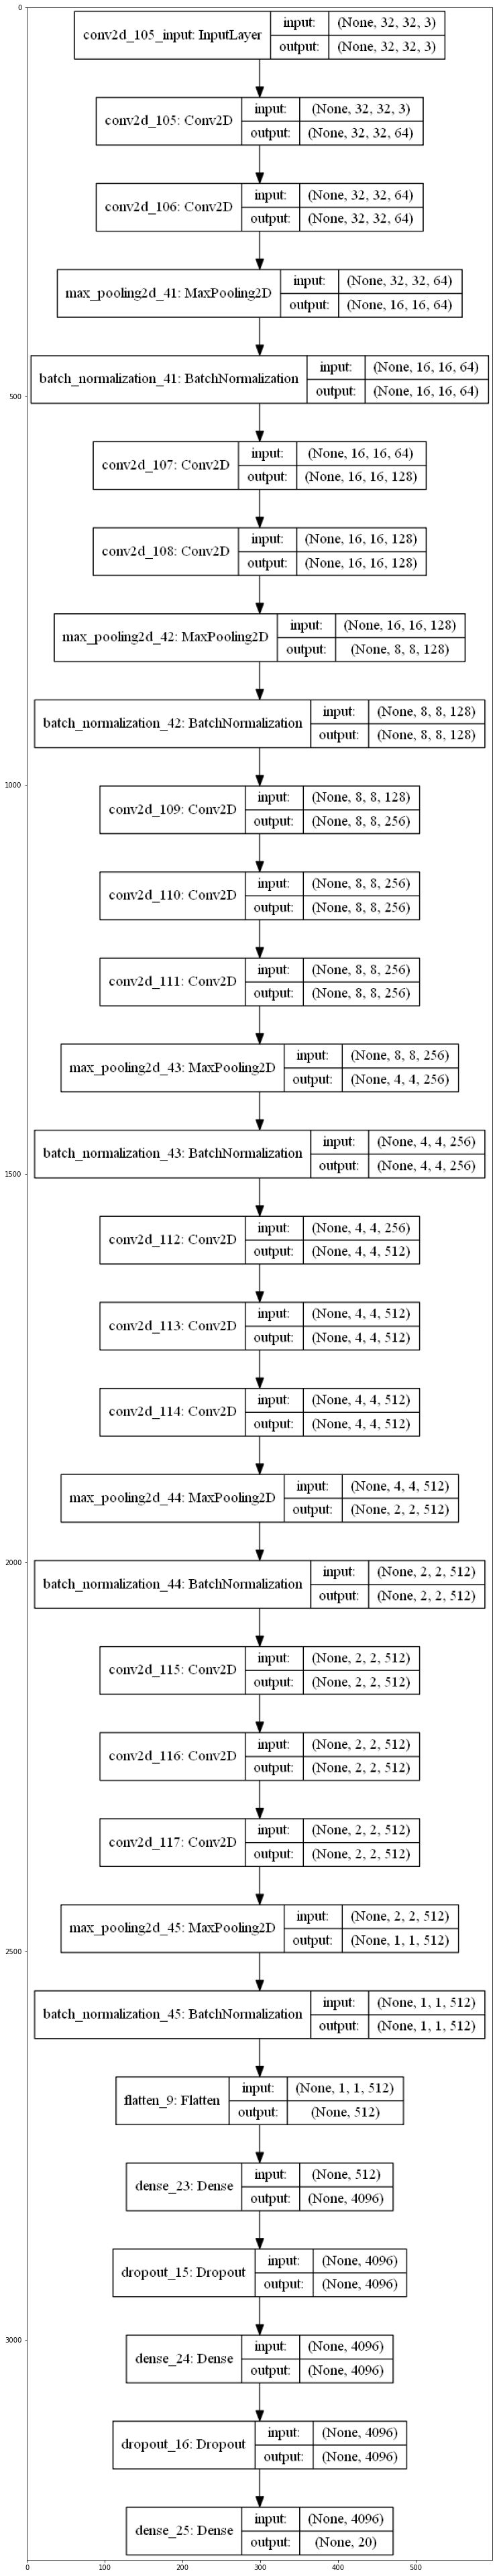

In [54]:
%matplotlib inline
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plot_model(model, to_file='LittleVGG.png', show_shapes=True, show_layer_names=True)
img = mpimg.imread('LittleVGG.png')
plt.figure(figsize=(100,70))
imgplot = plt.imshow(img)

In [55]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [56]:
checkpoint=ModelCheckpoint(r"D:\Projects\Simpsons Character Recognition\Checkpoint_weights.h5",
                            monitor='val_loss',
                            mode='min',
                            save_best_only=True,
                            verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.00001)

# we put our call backs into a callback list
callbacks = [earlystop,checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.0001),
              metrics = ['accuracy'])

nb_train_samples = 20933
nb_validation_samples = 990
epochs = 20

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // 12,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // 12)

Epoch 1/20
1744/1744 [==============================] - 82s 47ms/step - loss: 2.3214 - accuracy: 0.3056 - val_loss: 2.1905 - val_accuracy: 0.4603

Epoch 00001: val_loss improved from inf to 2.19049, saving model to D:\Projects\Simpsons Character Recognition\Checkpoint_weights.h5
Epoch 2/20
1744/1744 [==============================] - 77s 44ms/step - loss: 1.5105 - accuracy: 0.5481 - val_loss: 1.0834 - val_accuracy: 0.6229

Epoch 00002: val_loss improved from 2.19049 to 1.08337, saving model to D:\Projects\Simpsons Character Recognition\Checkpoint_weights.h5
Epoch 3/20
1744/1744 [==============================] - 79s 45ms/step - loss: 1.2069 - accuracy: 0.6465 - val_loss: 0.2298 - val_accuracy: 0.7023

Epoch 00003: val_loss improved from 1.08337 to 0.22981, saving model to D:\Projects\Simpsons Character Recognition\Checkpoint_weights.h5
Epoch 4/20
1744/1744 [==============================] - 78s 45ms/step - loss: 1.0396 - accuracy: 0.7022 - val_loss: 0.9782 - val_accuracy: 0.7867

Epoch

In [77]:
from keras.models import load_model

# 77% Accuracy after just 10 Epochs
classifier = load_model(r'D:\Projects\Simpsons Character Recognition\Checkpoint_weights.h5')

classes=r'D:\Projects\Simpsons Character Recognition\1408_27569_bundle_archive\kaggle_simpson_testset'
my_dirs = [d for d in os.listdir(classes) if os.path.isdir(os.path.join(classes, d))]

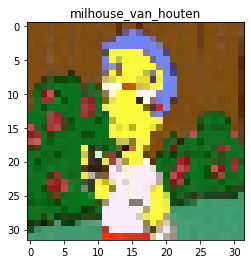

In [83]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img=image.load_img(r'D:\Projects\Simpsons Character Recognition\1408_27569_bundle_archive\kaggle_simpson_testset\milhouse_van_houten\milhouse_van_houten_49.jpg', target_size=(32,32))
img=np.asarray(img)
plt.imshow(img)
img=np.expand_dims(img,axis=0)
from keras.models import load_model
saved_model = load_model(r"D:\Projects\Simpsons Character Recognition\Checkpoint_weights.h5")
output=saved_model.predict_classes(img)[0]
plt.title(my_dirs[output])
plt.show()


In [73]:
my_dirs

['abraham_grampa_simpson',
 'apu_nahasapeemapetilon',
 'bart_simpson',
 'charles_montgomery_burns',
 'chief_wiggum',
 'comic_book_guy',
 'edna_krabappel',
 'homer_simpson',
 'kent_brockman',
 'krusty_the_clown',
 'lenny_leonard',
 'lisa_simpson',
 'marge_simpson',
 'mayor_quimby',
 'milhouse_van_houten',
 'moe_szyslak',
 'ned_flanders',
 'nelson_muntz',
 'principal_skinner',
 'sideshow_bob']

In [74]:
my_dirs[14]

'milhouse_van_houten'